In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams["font.family"] = "monospace"

$$ t = f(x;w_0, w_1) = w_0 + w_1x $$
$$ \widehat{w_0} = \bar{t} - w_1\bar{x} $$
$$ \widehat{w_1} = \frac{\overline{xt} - \bar{x}\bar{t}}{\overline{x^2} - (\bar{x})^2} $$

In [2]:
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)


In [3]:
x, t = X.ravel(), y.ravel()

pd.DataFrame(
    {
        "x_n": x.round(4),
        "t_n": t.round(4),
        "x_n * t_n": (x * t).round(4),
        "x_n^2": (x**2).round(3),
    },
)


,x_n,t_n,x_n * t_n,x_n^2
0,0.7491,6.3343,4.7449,0.561
1,1.9014,9.4053,17.8835,3.615
2,1.4640,8.4837,12.4201,2.143
3,1.1973,5.6044,6.7102,1.434
4,0.3120,4.7164,1.4717,0.097
...,...,...,...,...
95,0.9876,6.1470,6.0707,0.975
96,1.0455,7.0593,7.3803,1.093
97,0.8551,6.9064,5.9055,0.731
98,0.0508,4.4292,0.2252,0.003


In [4]:
x_bar = np.mean(x)
t_bar = np.mean(t)
xt_bar = np.mean(x * t)
xx_bar = np.mean(x**2)

w_1 = (xt_bar - x_bar * t_bar) / (xx_bar - x_bar**2)
w_0 = t_bar - w_1 * x_bar

In [7]:
print(
    "w_1",
    f"({xt_bar:.1f} - {x_bar:.1f} * {t_bar:.1f}) / ({xx_bar:.1f} - {x_bar:.1f} * {x_bar:.1f})",
    f"{(xt_bar - x_bar * t_bar):.1f} / {(xx_bar - x_bar ** 2):1f}",
    f"{w_1:.1f}",
    sep=" = ",
)

print("w_0", f"{t_bar:.1f} - {w_1:.1f} * {x_bar:.1f}", f"{w_0:.1f}", sep=" = ")

print("f(x; w_0, w_1)", "w_0 + w_1 * x", f"{w_0:.1f} + {w_1:.1f} * x", sep=" = ")

w_1 = (7.4 - 0.9 * 6.8) / (1.2 - 0.9 * 0.9) = 1.0 / 0.350460 = 2.8
w_0 = 6.8 - 2.8 * 0.9 = 4.2
f(x; w_0, w_1) = w_0 + w_1 * x = 4.2 + 2.8 * x


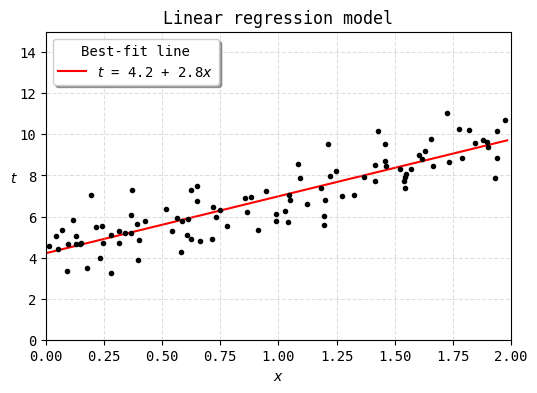

In [6]:
x_min, x_max = x.min() - 0.01, x.max() + 0.01
y_min, y_max = t.min() - 0.01, t.max() + 0.01

x_test = np.linspace(x_min, x_max, 10)[:, np.newaxis]
t_pred = w_0 + w_1 * x_test

plt.figure(figsize=(6, 4))

plt.plot(X, y, "k.", zorder=2)
plt.plot(x_test, t_pred, "r-", label=f"$t$ = {w_0:.1f} + {w_1:.1f}$x$", zorder=1)

plt.title("Linear regression model")
plt.legend(title="Best-fit line", loc="upper left", shadow=True)

plt.xlabel("$x$")
plt.ylabel("$t$", rotation=0)

plt.axis([0, 2, 0, 15])
plt.grid(linestyle="--", alpha=0.4)
plt.show()